### Notebook that takes the confusion matrices from the test set predictions on the best performing model to group the neutrophils ( PMO, MYB, MMZ, NGB, and NGS) into a single class, NEU

In [37]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
folder = 'pickle'
inner_folder = 'augmented'

with open(os.path.join(folder, inner_folder, 'test_confusion_data'), 'rb') as f:
    conf_matrix = pickle.load(f)

In [39]:
class_labels = [str(i) for i in range(21)]
class_names = ["ABE", "ART", "BAS", "BLA", "EBO", "EOS", "FGC", "HAC", "KSC", "LYI", "LYT", "NEU", "MON", "NIF", "OTH", "PEB", "PLM"]
def plot_confusion_matrix(conf_matrix):
    # Group PMO, MYB, MMZ, NGB, and NGS into one category (11, 13, 14, 15, 20)
    new_conf_matrix = conf_matrix
    new_conf_matrix[11, :] = np.sum(conf_matrix[[11, 13, 14, 15, 20], :], axis=0)
    new_conf_matrix[:, 11] = np.sum(conf_matrix[:, [11, 13, 14, 15, 20]], axis=1)
    new_conf_matrix = np.delete(new_conf_matrix, [13, 14, 15, 20], axis=0)
    new_conf_matrix = np.delete(new_conf_matrix, [13, 14, 15, 20], axis=1)

    plt.figure(figsize=(15, 12))
    heatmap = sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Class', fontsize=20)
    plt.ylabel('True Class', fontsize=20)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    
    heatmap.tick_params(axis='x', which='major', pad=10)
    heatmap.tick_params(axis='y', which='major', pad=10)
    
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('Number of Samples', fontsize=15, rotation=90, labelpad=10)
    cbar.ax.yaxis.set_label_position('left')
    cbar.ax.tick_params(labelsize=15)
    plt.show()
    return new_conf_matrix

In [40]:
def plot_normalised_confusion_matrix(conf_matrix):
    class_totals = np.sum(conf_matrix, axis=1)

    normalised_conf_matrix = np.zeros_like(conf_matrix, dtype=float)
    for i in range(len(class_totals)):
        if class_totals[i] != 0:
            normalised_conf_matrix[i, :] = conf_matrix[i, :] / class_totals[i] * 100

    plt.figure(figsize=(15, 12))
    heatmap = sns.heatmap(normalised_conf_matrix, annot=True, fmt='.1f', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Class', fontsize=20)
    plt.ylabel('True Class', fontsize=20)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    cbar = heatmap.collections[0].colorbar
    cbar.set_label('% of Samples', fontsize=15, rotation=90, labelpad=10)
    cbar.ax.yaxis.set_label_position('left')
    cbar.ax.tick_params(labelsize=15)
    plt.show()
    return normalised_conf_matrix

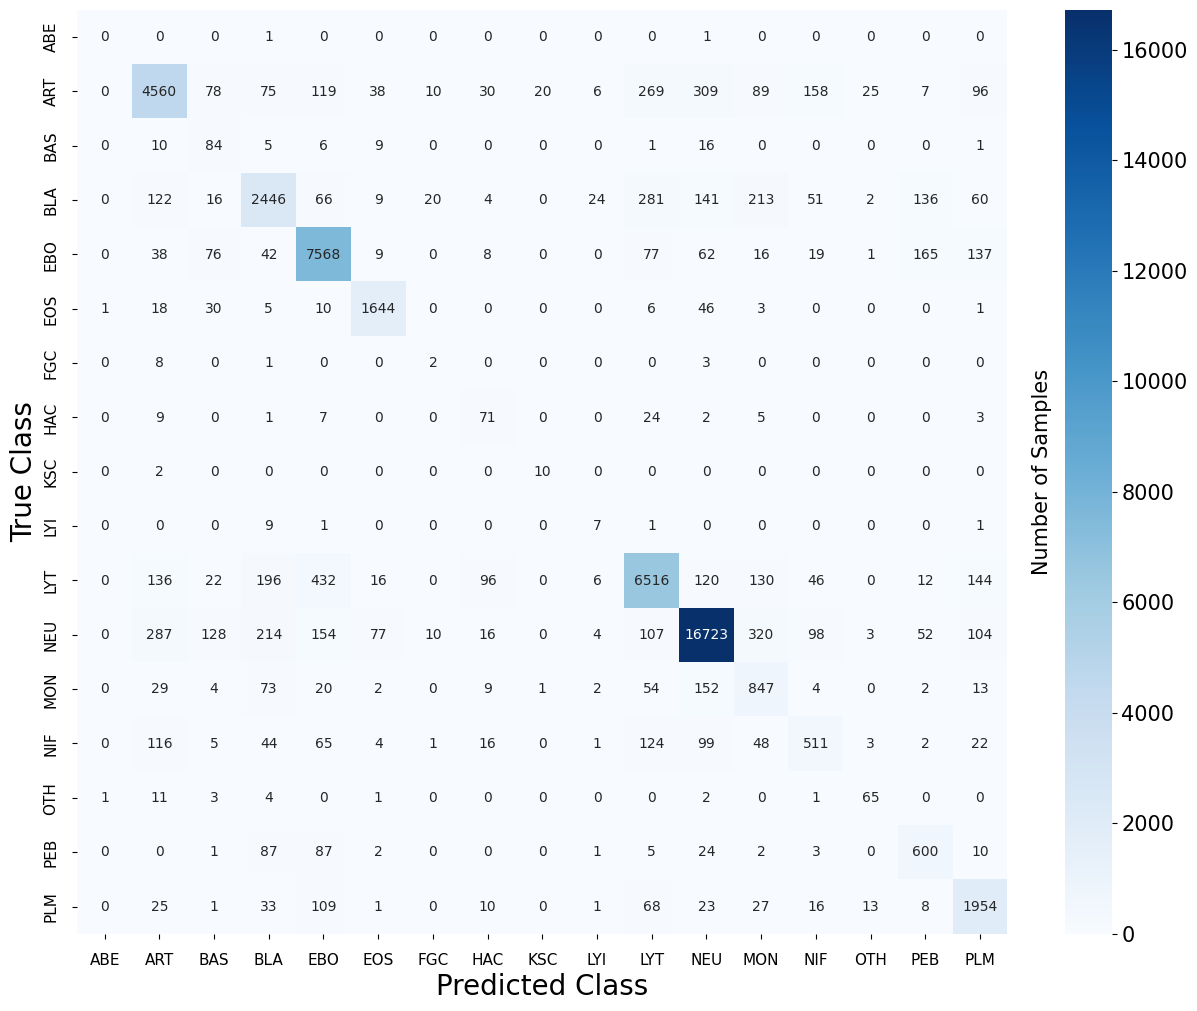

In [41]:
neu_conf_matrix = plot_confusion_matrix(conf_matrix)

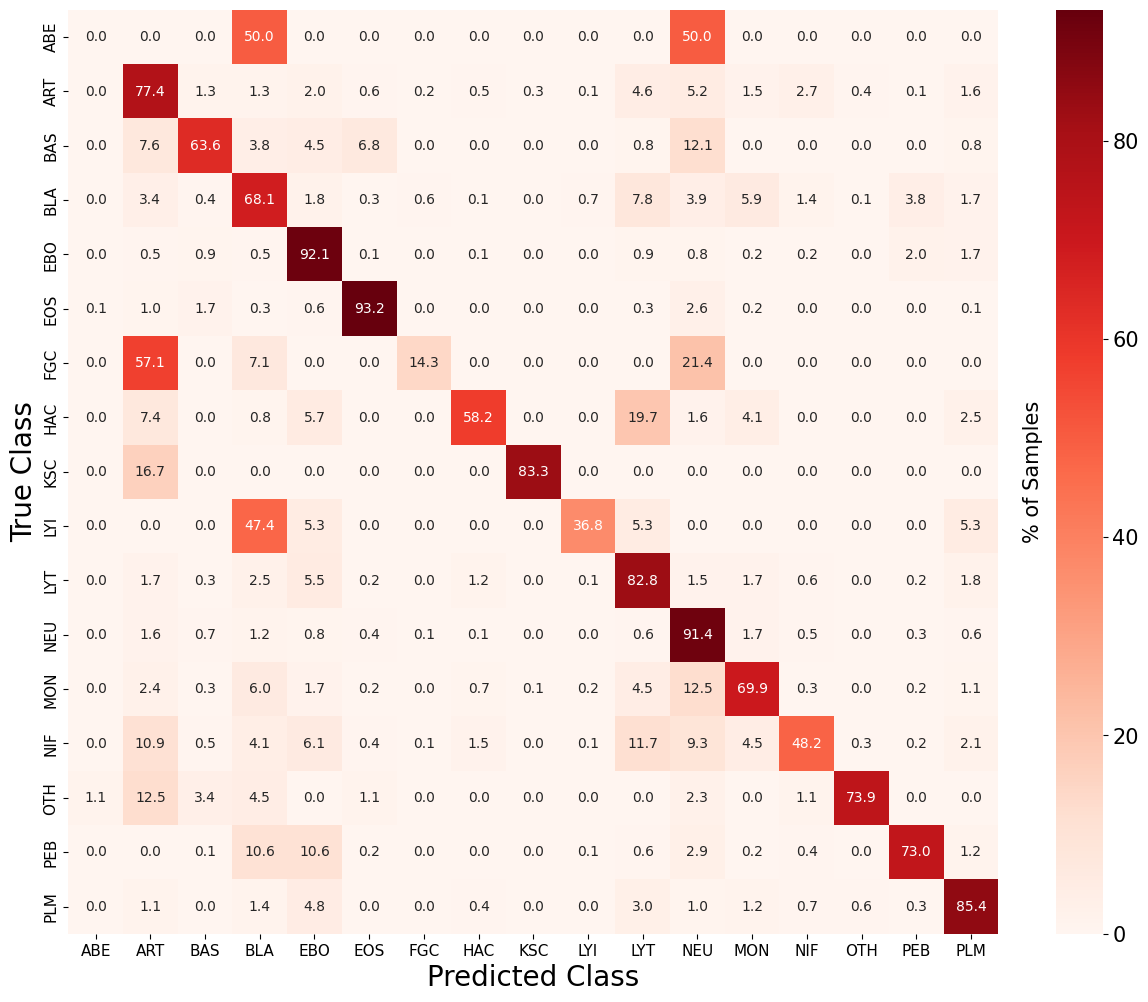

In [42]:
normalised_conf_matrix = plot_normalised_confusion_matrix(neu_conf_matrix)